<a href="https://colab.research.google.com/github/ManasaCherukupally1/Projects/blob/main/TextClassification_using_Pre-trained_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disaster tweets Text Classification with fine tuning on pre-trained  Bert model
Dataset is taken from the Kaggle website https://www.kaggle.com/competitions/nlp-getting-started/data

In [ ]:
#importing Dataset
import pandas as pd

df=pd.read_csv('/content/train.csv')
print(df.head(50))

    id keyword                       location  \
0    1     NaN                            NaN   
1    4     NaN                            NaN   
2    5     NaN                            NaN   
3    6     NaN                            NaN   
4    7     NaN                            NaN   
5    8     NaN                            NaN   
6   10     NaN                            NaN   
7   13     NaN                            NaN   
8   14     NaN                            NaN   
9   15     NaN                            NaN   
10  16     NaN                            NaN   
11  17     NaN                            NaN   
12  18     NaN                            NaN   
13  19     NaN                            NaN   
14  20     NaN                            NaN   
15  23     NaN                            NaN   
16  24     NaN                            NaN   
17  25     NaN                            NaN   
18  26     NaN                            NaN   
19  28     NaN      

Getting the information of the data

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


# Data Preprocessing

Check for the missing values in the data

In [ ]:
# Check for missing values (NaN) using isna() or isnull()
missing_values = df.isna()  # You can also use df.isnull()

# Count missing values in each column using sum()
missing_count = missing_values.sum()

# Print the count of missing values for each column
print(missing_count)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [ ]:
df = df.drop_duplicates()
print(df.shape)

(7613, 5)


In [ ]:
df= df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)


Removal of URLs, punctuation, hashtags, and "@" symbols

In [ ]:
import string
import re

# Function to remove URLs, punctuation, hashtags, and "@" symbols
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove "@" symbols
    text = re.sub(r'@\w+', '', text)
    return text

# Apply the clean_text function to all object columns in the DataFrame
df = df.applymap(lambda x: clean_text(x) if isinstance(x, str) else x)

# Print the DataFrame with URLs, punctuation, hashtags, and "@" symbols removed
print(df)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     our deeds are the reason of this earthquake ma...       1  
1                 forest fire near la ronge sask canada       1  
2     all residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     just got sent this photo from ruby alaska as s...       1  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary thetawniest the out of control wild...       1  
7610              m19

In [ ]:
'''
import pandas as pd
from textblob import TextBlob

# Function to correct spelling in a single cell
def correct_spelling(cell):
    if isinstance(cell, str):
        blob = TextBlob(cell)
        return str(blob.correct())
    else:
        return cell

# Apply the spelling correction function to all columns in the DataFrame
df_corrected = df.applymap(correct_spelling)

# Print the DataFrame with spelling corrections
print(df_corrected)
'''


'\nimport pandas as pd\nfrom textblob import TextBlob\n\n# Function to correct spelling in a single cell\ndef correct_spelling(cell):\n    if isinstance(cell, str):\n        blob = TextBlob(cell)\n        return str(blob.correct())\n    else:\n        return cell\n\n# Apply the spelling correction function to all columns in the DataFrame\ndf_corrected = df.applymap(correct_spelling)\n\n# Print the DataFrame with spelling corrections\nprint(df_corrected)\n'

In [ ]:
import os
import spacy
os.system('python -m spacy download en_core_web_sm')
nlp=spacy.load('en_core_web_sm')

Checking the spells and correcting them

In [ ]:
from spellchecker import SpellChecker


# Create a SpellChecker object
spell = SpellChecker()

def spell_check_text(text):
    # Split the text into tokens
    tokens = text.split()

    # Initialize a list to store corrected tokens
    corrected_tokens = []

    for token in tokens:
        # Check if the token is misspelled
        corrected_token = spell.correction(token)

        # Append the corrected token to the list, or the original token if it cannot be corrected
        corrected_tokens.append(corrected_token if corrected_token else token)

    # Join the corrected tokens into a single string
    corrected_text = " ".join(corrected_tokens)

    return corrected_text


# Apply spell checking to the "text" column
df['text'] = df['text'].apply(spell_check_text)

# Display the DataFrame with spell-checked "text" column
print(df)



         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     our deeds are the reason of this earthquake ma...       1  
1                  forest fire near la range ask canada       1  
2     all residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     just got sent this photo from ruby alaska as s...       1  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary thetawniest the out of control wild...       1  
7610               m1

In [ ]:
pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.5 MB/s eta 0:00:00


In [ ]:
# Save the DataFrame to a CSV file
#df.to_csv('output.csv', index=False)

In [ ]:
'''
import pandas as pd
df= pd.read_csv('/content/output.csv')
'''

Filling Missing Data

In [ ]:
#pip install spacy

Extracting the Keywords from the text

In [ ]:
# Define a function to extract a single keyword from text
def extract_single_keyword(text, keyword):
    if text is None:
        return keyword
    if keyword is None or pd.isna(keyword) or keyword.strip() == '':
        # Process the text and extract the first noun as a keyword
        doc = nlp(text)
        for token in doc:
            if token.pos_ == 'NOUN':
                return token.text
    return keyword


# Apply the keyword extraction function to the 'text' column and update 'keyword' column
df['keyword'] = df.apply(lambda row: extract_single_keyword(row['text'], row['keyword']), axis=1)

# Display the DataFrame
print(df)



         id    keyword location  \
0         1      deeds      NaN   
1         4     forest      NaN   
2         5  residents      NaN   
3         6     people      NaN   
4         7      photo      NaN   
...     ...        ...      ...   
7608  10869     cranes      NaN   
7609  10870    control      NaN   
7610  10871         km      NaN   
7611  10872     police      NaN   
7612  10873      homes      NaN   

                                                   text  target  
0     our deeds are the reason of this earthquake ma...       1  
1                  forest fire near la range ask canada       1  
2     all residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     just got sent this photo from ruby alaska as s...       1  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609  ariaahrary thetawniest the out of control wil

Extract the location from the Text

In [ ]:
def fill_empty_locations(df):
    # Iterate over the DataFrame rows
    for index, row in df.iterrows():
        # Check if the "location" column is empty and "text" is not NaN
        if pd.isna(row['location']) and not pd.isna(row['text']):
            # Perform entity recognition on the "text" column
            doc = nlp(row['text'])

            # Extract entities of type 'GPE' (Geopolitical Entity)
            entities = [ent.text for ent in doc.ents if ent.label_ == 'GPE']

            # If any 'GPE' entities are found, fill the "location" column
            if entities:
                df.at[index, 'location'] = entities[0]  # Use the first entity found



# Fill empty locations using entity recognition
fill_empty_locations(df)

# Display the DataFrame with filled locations
print(df)


         id    keyword    location  \
0         1      deeds         NaN   
1         4     forest    la range   
2         5  residents         NaN   
3         6     people  california   
4         7      photo         NaN   
...     ...        ...         ...   
7608  10869     cranes         NaN   
7609  10870    control  california   
7610  10871         km         NaN   
7611  10872     police    portugal   
7612  10873      homes  california   

                                                   text  target  
0     our deeds are the reason of this earthquake ma...       1  
1                  forest fire near la range ask canada       1  
2     all residents asked to shelter in place are be...       1  
3     13000 people receive wildfires evacuation orde...       1  
4     just got sent this photo from ruby alaska as s...       1  
...                                                 ...     ...  
7608  two giant cranes holding a bridge collapse int...       1  
7609  ariaahrar

Lemmatization of the Keywords,Location and Text

In [ ]:

# Define a function to perform lemmatization on a single text
def lemmatize_text(text):
    if text and not pd.isna(text) and text.strip():
        # Process the text using spaCy
        doc = nlp(text)

        # Extract lemmas for each token in the document
        lemmas = [token.lemma_ for token in doc]

        # Join the lemmas into a single string
        lemmatized_text = " ".join(lemmas)

        return lemmatized_text
    else:
        return text

# Apply lemmatization to the columns, checking if the string exists before processing
df['keyword'] = df['keyword'].apply(lemmatize_text)
df['location'] = df['location'].apply(lemmatize_text)
df['text'] = df['text'].apply(lemmatize_text)

# Display the DataFrame with lemmatized columns
print(df)



         id   keyword    location  \
0         1      deed         NaN   
1         4    forest    la range   
2         5  resident         NaN   
3         6    people  california   
4         7     photo         NaN   
...     ...       ...         ...   
7608  10869     crane         NaN   
7609  10870   control  california   
7610  10871        km         NaN   
7611  10872    police    portugal   
7612  10873      home  california   

                                                   text  target  
0     our deed be the reason of this earthquake may ...       1  
1                  forest fire near la range ask canada       1  
2     all resident ask to shelter in place be be not...       1  
3     13000 people receive wildfire evacuation order...       1  
4     just got send this photo from ruby alaska as s...       1  
...                                                 ...     ...  
7608  two giant crane hold a bridge collapse into ne...       1  
7609  ariaahrary thetawnies

Removal of stopwords

In [ ]:
def remove_stop_words(text):
    # Process the text using spaCy
    if not pd.isna(text):
      doc = nlp(text)

      # Create a list of tokens without stop words
      tokens_without_stopwords = [token.text for token in doc if not token.is_stop]

      # Join the remaining tokens into a single string
      text_without_stopwords = " ".join(tokens_without_stopwords)

      return text_without_stopwords

# Apply stop words removal to the "text" column
df['text'] = df['text'].apply(remove_stop_words)

# Display the DataFrame with stop words removed from the "text" column
print(df)




         id   keyword    location  \
0         1      deed         NaN   
1         4    forest    la range   
2         5  resident         NaN   
3         6    people  california   
4         7     photo         NaN   
...     ...       ...         ...   
7608  10869     crane         NaN   
7609  10870   control  california   
7610  10871        km         NaN   
7611  10872    police    portugal   
7612  10873      home  california   

                                                   text  target  
0                  deed reason earthquake allah forgive       1  
1                  forest fire near la range ask canada       1  
2     resident ask shelter place notify officer evac...       1  
3     13000 people receive wildfire evacuation order...       1  
4     got send photo ruby alaska smoke wildfires pou...       1  
...                                                 ...     ...  
7608       giant crane hold bridge collapse nearby home       1  
7609  ariaahrary thetawnies

In [ ]:
# Save the DataFrame to a CSV file
#df.to_csv('output_cleaned.csv', index=False)



In [ ]:
'''
import pandas as pd
df=pd.read_csv('/content/output_cleaned.csv')
'''

Text visualization

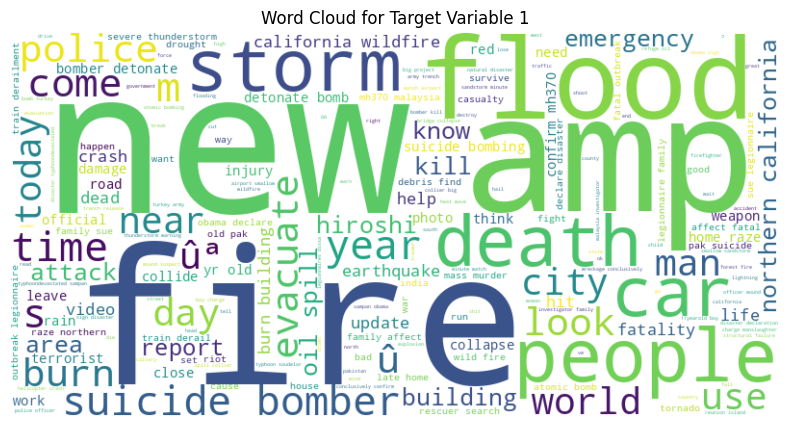

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a DataFrame named 'df' with 'text' and 'target' columns

# Filter the DataFrame to select rows where the target variable is 1
df_filtered = df[df['target'] == 1]

# Combine the text from all filtered rows into a single string
text_to_analyze = ' '.join(df_filtered['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_to_analyze)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Target Variable 1')
plt.axis('off')
plt.show()


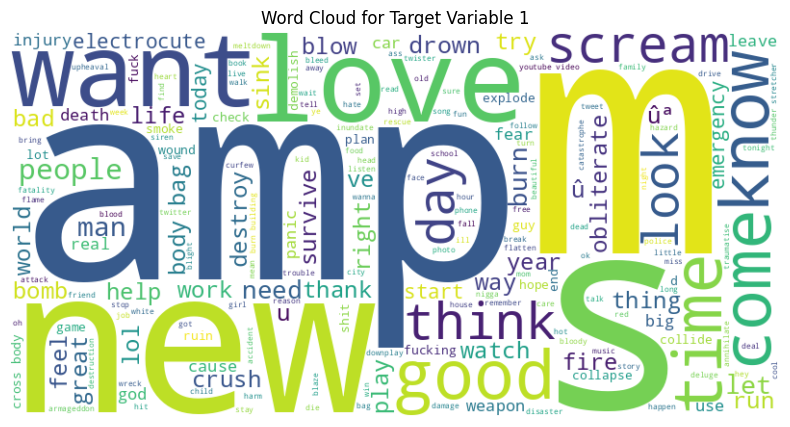

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a DataFrame named 'df' with 'text' and 'target' columns

# Filter the DataFrame to select rows where the target variable is 1
df_filtered = df[df['target'] == 0]

# Combine the text from all filtered rows into a single string
text_to_analyze = ' '.join(df_filtered['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_to_analyze)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Target Variable 1')
plt.axis('off')
plt.show()


Bigrams in the text

In [ ]:
import pandas as pd
import nltk
from nltk.util import bigrams
from nltk import word_tokenize
from collections import Counter
nltk.download('punkt')


# Assuming you have a DataFrame named 'df' with 'text' and 'target' columns

# Create a function to extract bigrams and store them in a DataFrame
def create_bigram_dataframe(df, target_value):
    # Filter the DataFrame to select rows with the specified target value
    df_filtered = df[df['target'] == target_value]

    # Combine the text from all filtered rows into a single string
    text = ' '.join(df_filtered['text'])

    # Tokenize the text
    tokens = word_tokenize(text)

    # Generate bigrams
    bigrams_list = list(bigrams(tokens))

    # Create a DataFrame with the bigrams in the "sentence" column
    bigram_df = pd.DataFrame({'sentence': [' '.join(bigram) for bigram in bigrams_list]})

    return bigram_df

# Create separate DataFrames for target 1 and target 0
df_target_1_bigrams = create_bigram_dataframe(df, target_value=1)
df_target_0_bigrams = create_bigram_dataframe(df, target_value=0)

# Print the DataFrames with bigrams as a "sentence" column
print("DataFrame for Target 1 Bigrams:")
print(df_target_1_bigrams.head(10))

print("\nDataFrame for Target 0 Bigrams:")
print(df_target_0_bigrams.head(10))



DataFrame for Target 1 Bigrams:
            sentence
0        deed reason
1  reason earthquake
2   earthquake allah
3      allah forgive
4     forgive forest
5        forest fire
6          fire near
7            near la
8           la range
9          range ask

DataFrame for Target 0 Bigrams:
                     sentence
0                       s man
1                    man love
2                  love fruit
3                fruit summer
4               summer lovely
5                  lovely car
6                    car fast
7        fast goooooooaaaaaal
8  goooooooaaaaaal ridiculous
9           ridiculous london


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 18.7 MB/s eta 0:00:00


In [6]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from torch.nn import functional as F


In [7]:
# Example DataFrame
#df = pd.read_csv("/content/output_cleaned.csv")


Tokenizing the text for using the Bert sequence classification model "bert-base-uncased". Customizing the datset according to torch format. Loading the dataset in dataloader

In [8]:
# Tokenize text using a BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_seq_length = 128  # You can adjust this based on your data and model requirements

# Create a custom PyTorch Dataset
class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_seq_length):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_seq_length = max_seq_length

    def __len__(self):
        return len(self.data)

    # Inside the CustomDataset class __getitem__ method
    def __getitem__(self, index):
        text = str(self.data.iloc[index]['text'])
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_seq_length,
            padding='max_length',  # Pad to the max_length
            return_tensors='pt',
            truncation=True
        )
        input_ids = inputs['input_ids'].squeeze(0)  # Remove the batch dimension
        attention_mask = inputs['attention_mask'].squeeze(0)  # Remove the batch dimension
        label = torch.tensor(self.data.iloc[index]['target'], dtype=torch.long)
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': label
        }


# Create DataLoader for the dataset
dataset = CustomDataset(df, tokenizer, max_seq_length)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


creating the model

In [9]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # 2 classes (0 and 1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

Using the Stochastic Gradient Descent optimizer

In [10]:
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup

'''
# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Assuming binary classification

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
'''
# Use Stochastic Gradient Descent (SGD) optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # You can adjust the learning rate as needed
num_epochs = 1  # Reduce the number of epochs

# Learning rate scheduler (optional)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=100, num_training_steps=len(dataloader) * num_epochs)



for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass
        loss.backward()

        # Gradient clipping (optional)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        # Learning rate scheduler step (optional)
        scheduler.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(dataloader)}")

# Save the trained model if needed
# torch.save(model.state_dict(), 'bert_classifier_model.pth')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/1, Loss: 0.59041659145796


Evaluate the model

In [15]:
model.eval()  # Set the model to evaluation mode

true_labels = []
predicted_labels = []

with torch.no_grad():
    for batch in dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        # Forward pass to get predictions
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Convert logits to predicted labels
        predicted_labels_batch = logits.argmax(dim=1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted_labels_batch.cpu().numpy())

# Calculate F1-score
f1 = f1_score(true_labels, predicted_labels)

print(f"Validation/Test F1-Score: {f1:.2f}")

Validation/Test F1-Score: 0.74


Predict the text to classify whether the text is disaster text or not

In [16]:
def predict_target(text):
    model.eval()
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_seq_length,
        pad_to_max_length=True,
        return_tensors='pt',
        truncation=True
    )
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    probabilities = F.softmax(outputs.logits, dim=1)
    return probabilities[0][1].item()  # Probability of being in class 1

# Example usage
text_to_classify = "There is a wide spread of fire in California forests"
probability = predict_target(text_to_classify)
print(f"Probability of being in class 1: {probability}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2622: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Probability of being in class 1: 0.7978305220603943
